這是我用上課例題，自己重新畫過的Dijkstra流程圖

Dijkstra原理：最短路徑算法，用於計算一個節點到其他所有節點的最短路徑。主要特點是以起始點為中心向外層層擴展，直到擴展到終點為止。
典型的單源最短路徑演算法，用於計算一個節點到其他所有節點的最短路徑。主要特點是以起始點為中心向外層層擴充套件，直到擴充套件到終點為止。Dijkstra演算法是很有代表性的最短路徑演算法，在很多專業課程中都作為基本內容有詳細的介紹，如資料結構，圖論，運籌學等等。注意該演算法要求圖中不存在負權邊。

使用方式：
1.先將所有數字列出來，從小排到大。
2.開始照最短路徑開始排序。
3.全部列出來即可得到答案。

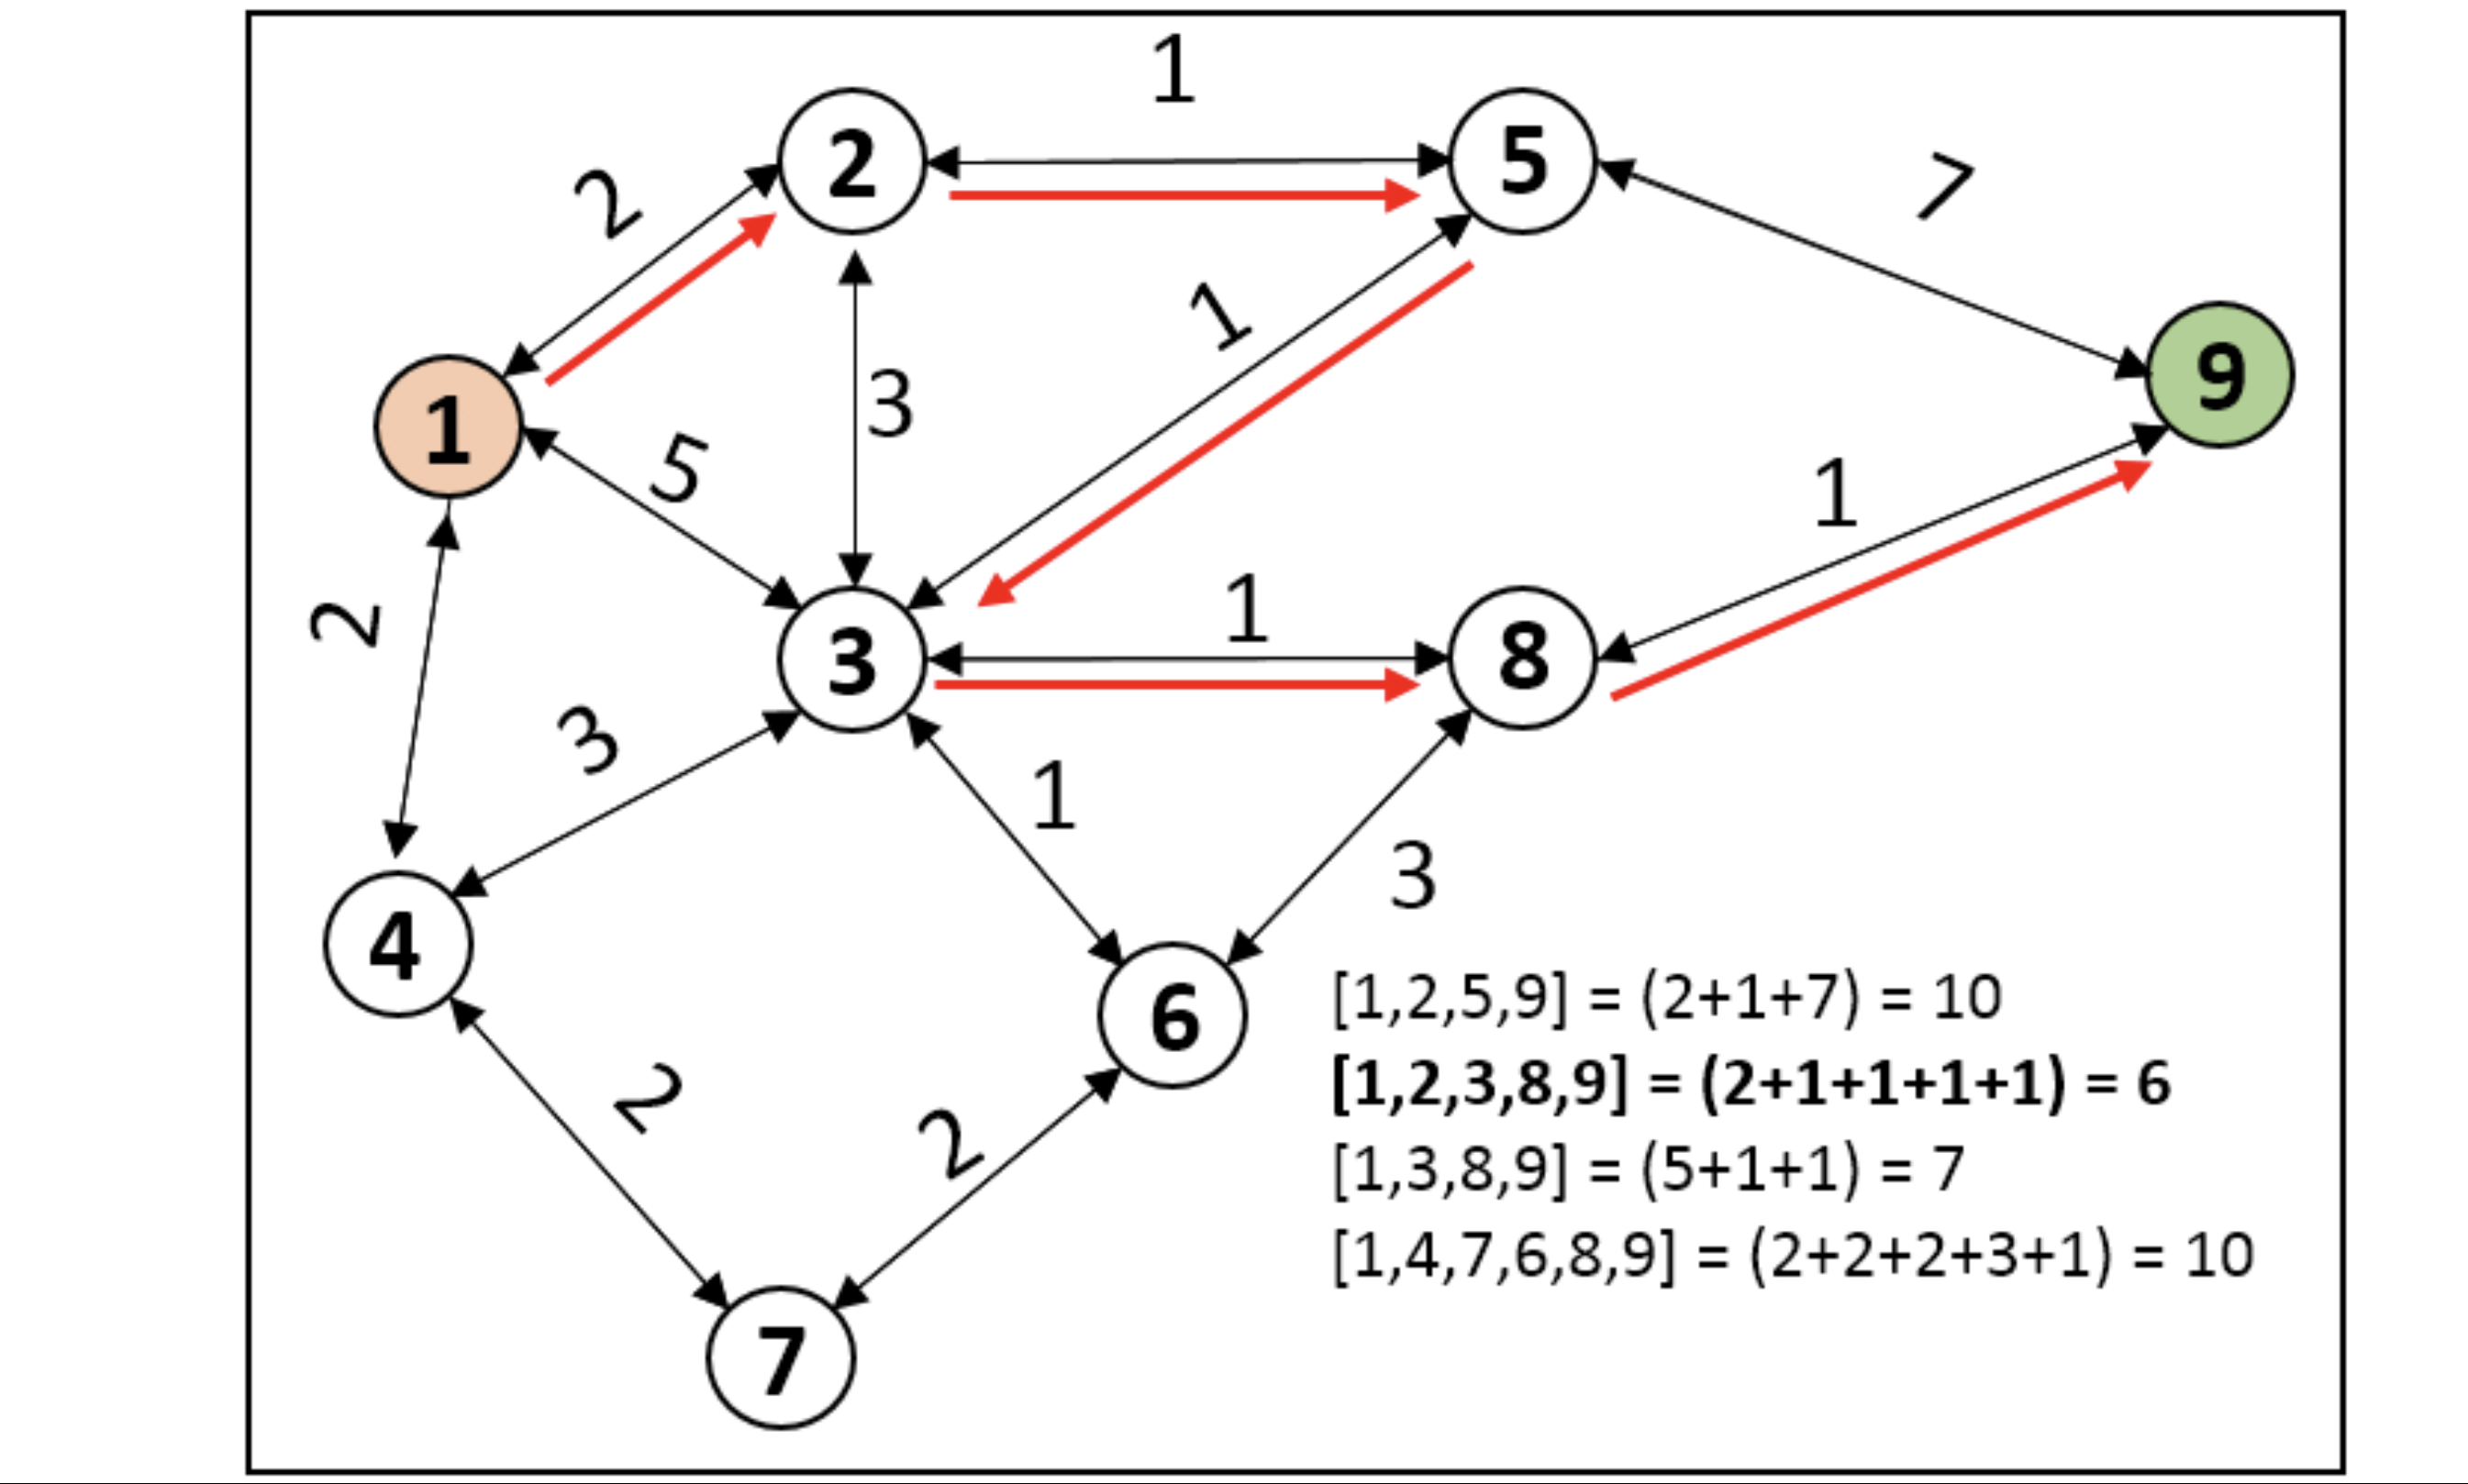

In [1]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Desktop/截圖 2020-01-03 下午8.03.25.png")

這是我用ipad手寫的流程圖

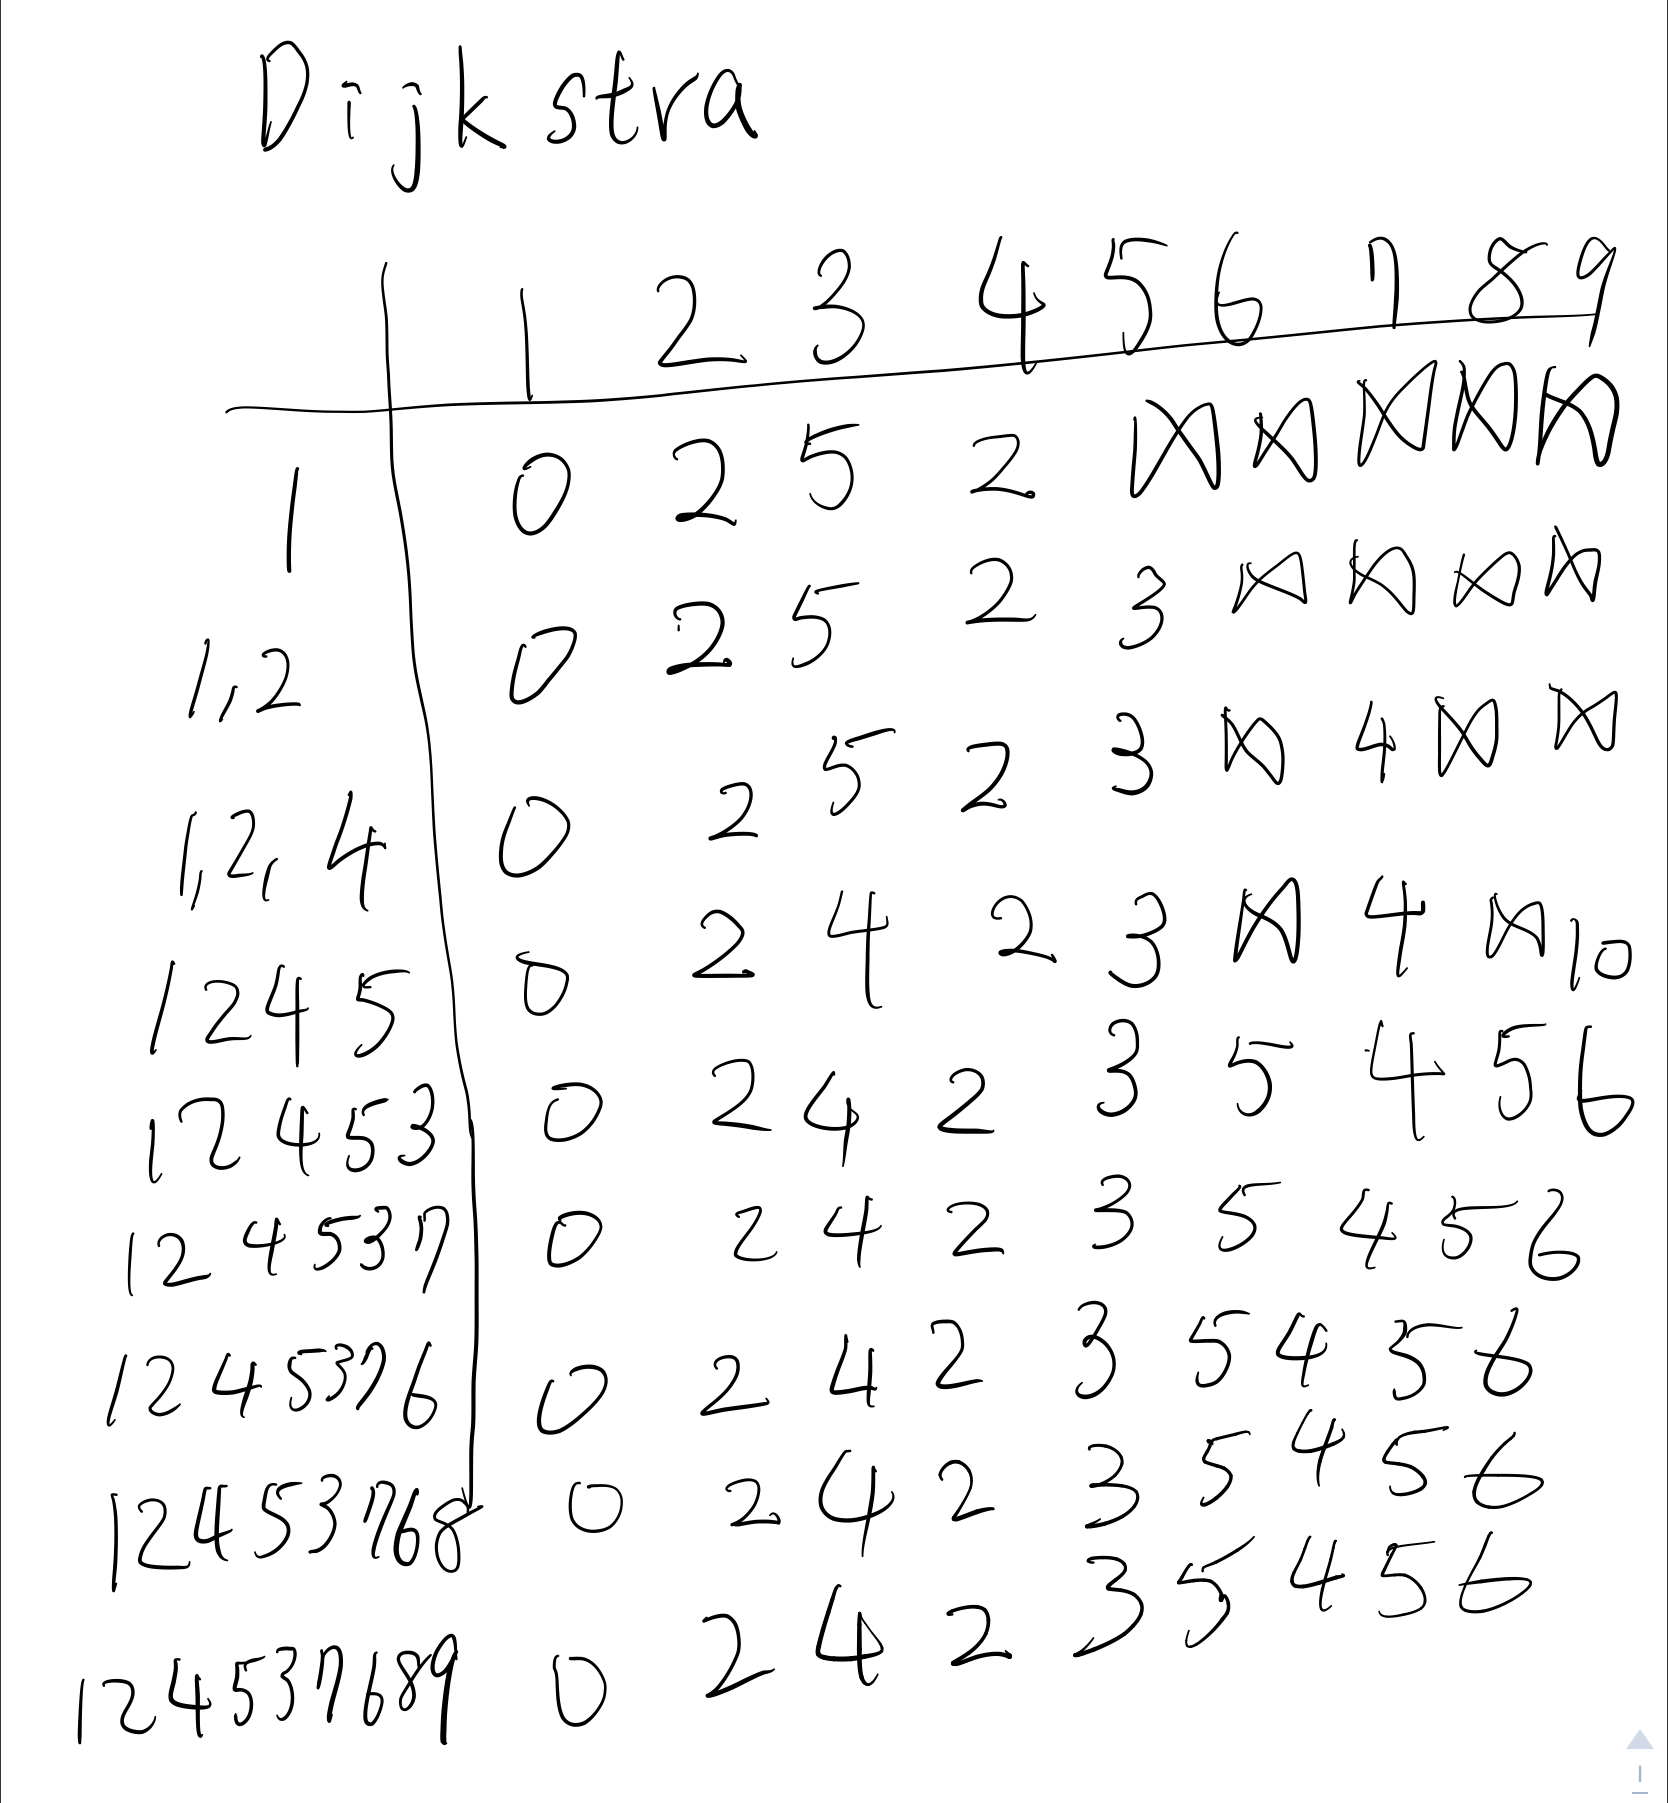

In [2]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Downloads/IMG_525435B5C543-1.jpeg")

Kruskal 接下來我選用上課範例來當作我的流程圖

1.weight由小排到大。
2.從小的開始看，同時我會畫圖在上面。
3.遇到已相連的則跳過。(不可重複相連)
4.最後全部組在一起得到MST。

Kruskal原理:首先，將每個頂點放入其自身的資料集合中。然後，按照權值的升序來選擇邊。當選擇每條邊時，判斷定義邊的頂點是否在不同的資料集中。如果是，將此邊插入最小生成樹的集合中，同時，將集合中包含每個頂點的聯合體取出，如果不是，就移動到下一條邊。重複這個過程直到所有的邊都探查過。

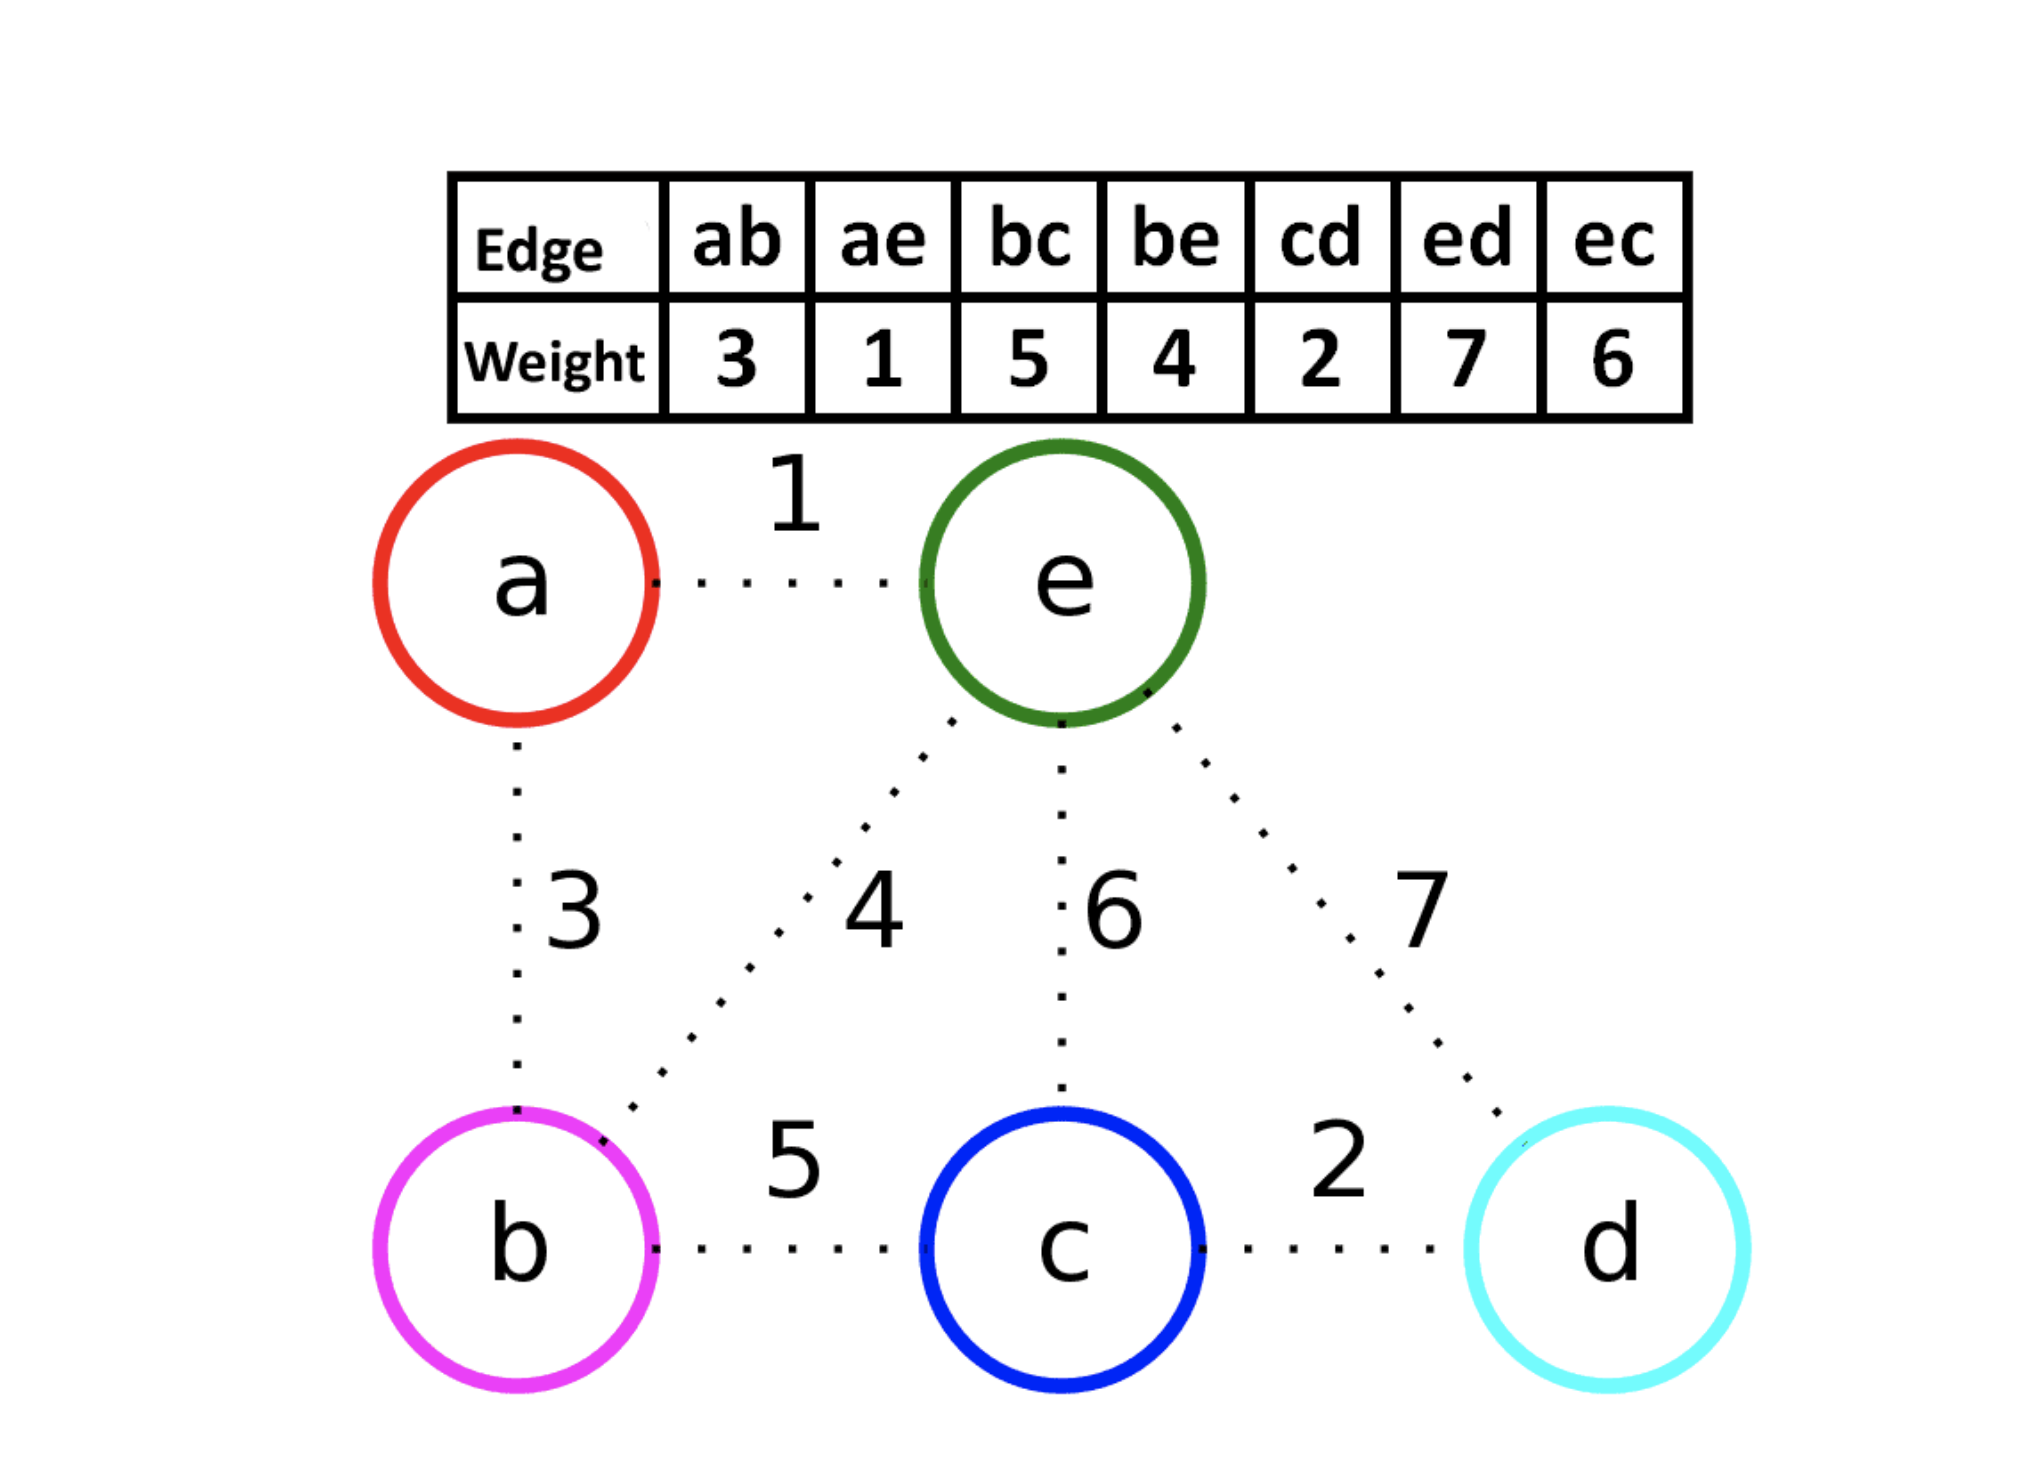

In [3]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Desktop/截圖 2020-01-03 下午8.11.01.png")

我一樣用ipad手寫的流程圖

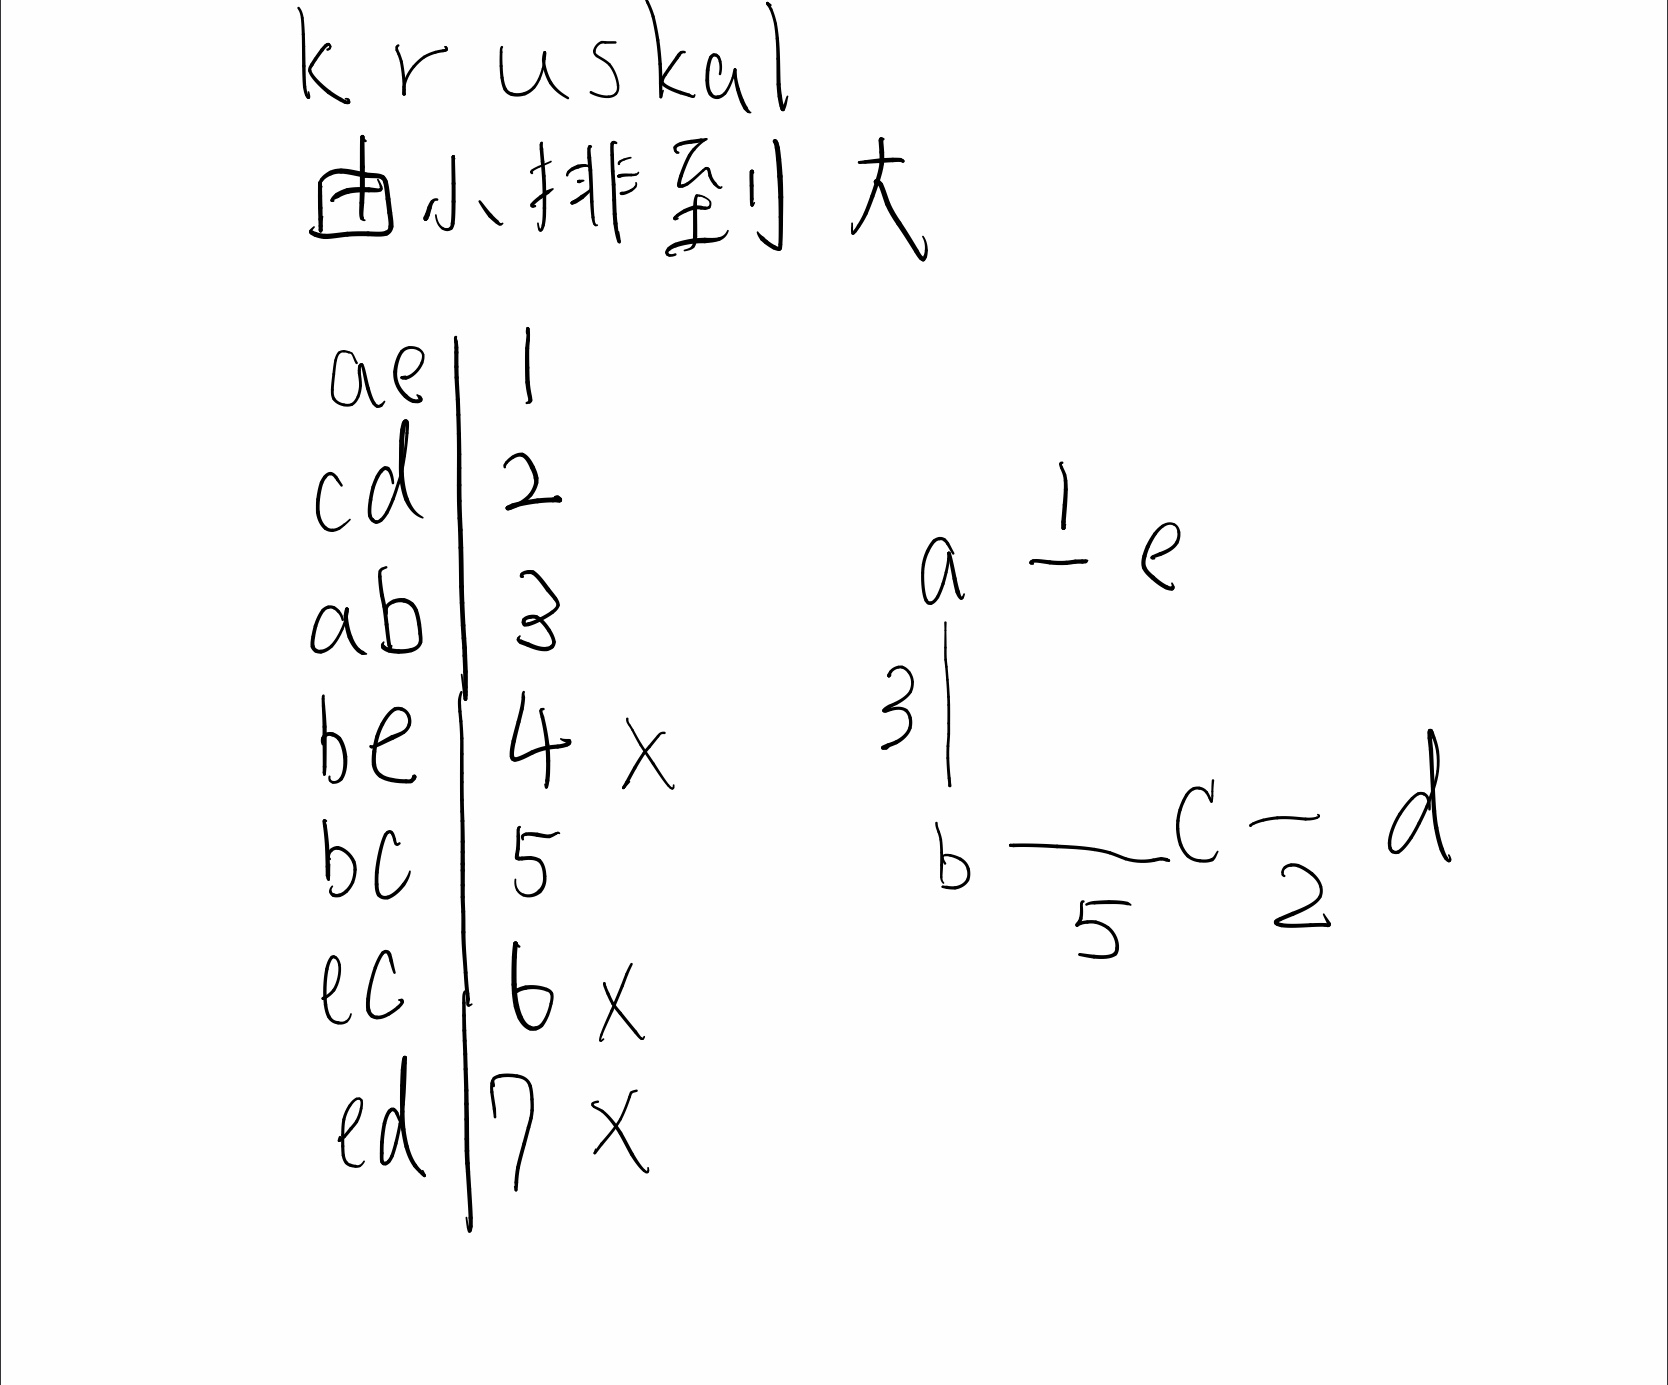

In [5]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Downloads/IMG_1191.jpg")

Dijkstra原理：最短路徑算法，用於計算一個節點到其他所有節點的最短路徑。主要特點是以起始點為中心向外層層擴展，直到擴展到終點為止。
典型的單源最短路徑演算法，用於計算一個節點到其他所有節點的最短路徑。主要特點是以起始點為中心向外層層擴充套件，直到擴充套件到終點為止。Dijkstra演算法是很有代表性的最短路徑演算法，在很多專業課程中都作為基本內容有詳細的介紹，如資料結構，圖論，運籌學等等。注意該演算法要求圖中不存在負權邊。

In [ ]:
from collections import defaultdict
from collections import OrderedDict
#Class to represent a graph
class Graph():

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  #用來記錄每加入一個點權重更新的歷程
                    for row in range(vertices)] 
    def addEdge(self,u,v,w): 
        
        self.graph.append([u,v,w])#紀錄點u到點v，及u到v權重
        
    def Dijkstra(self, s): #s為起點
        dist = dict()      #建立一個dict型式
        for a in range(self.V): #將圖形中各點逐一取出(0~8)
            dist[a] = float("Inf")
        dist[s] = 0
        
        Queue = [False] * self.V
        
        for cnt in range(self.V):
            u = self.ExtractMin(dist, Queue)
            Queue[u] = True
            for v in range(self.V): #relax
                if self.graph[u][v]>0: #adj[u] edge
                    if Queue[v] == False:
                        if dist[v] > dist[u] + self.graph[u][v]:
                            dist[v] = dist[u] + self.graph[u][v]
        return dist                    
        
    def ExtractMin(self, dist, Queue):
        Min = float("Inf")
        for v in range(self.V):
            if dist[v] < Min and Queue[v] == False:#看幾個頂點就設幾個False
                Min = dist[v]
                min_index = v
        return min_index



    def Kruskal(self):
        d2={}#字典
        min_arr=[]#儲存已用過的點
        treegraph=[]#儲存樹的圖案
        answer=[]
        #print(len(self.graph))
        #print (self.V)
        for i in range(len(self.graph)-1):#weight由小到大排序
            for j in range(len(self.graph)-i-1):
                if(self.graph[j][2]>self.graph[j+1][2]):
                    temp=self.graph[j]
                    self.graph[j]=self.graph[j+1]
                    self.graph[j+1]=temp
        #print(self.graph)
        min_arr.append(self.graph[0][0])
        min_arr.append(self.graph[0][1])
        treegraph.append(0)
        for i in range(1,self.V):
            flag1=0
            flag2=0
            for j in range(len(min_arr)):#相連點不能重複
                if(min_arr[j]==self.graph[i][0]):
                    flag1+=1
                if(min_arr[j]==self.graph[i][1]):
                    flag2+=1
            if((flag1+flag2)!=2):#檢測第二個圈圈是否被用過#檢測分別點
                if(flag1!=1):
                    min_arr.append(self.graph[i][0])
                if(flag2!=1):
                    min_arr.append(self.graph[i][1])
                treegraph.append(i)
        #print(min_arr)
        #print(treegraph)
        for i in range(len(treegraph)):
            answer.append("'"+str(self.graph[treegraph[i]][0])+"-"+str(self.graph[treegraph[i]][1])+"': "+str(self.graph[treegraph[i]][2]))
            d2[str(str(self.graph[treegraph[i]][0])+"-"+str(self.graph[treegraph[i]][1]))] = self.graph[treegraph[i]][2]
        #print (answer)
        OrderedDict(sorted(d2.items(), key=lambda t: t[1]))
        #print (d2)
        return(d2)





感想：這學期的最後一份作業￼，感覺自己可以邏輯方面都有明顯的了解￼。其實我之前都不太清楚為什麼老師會希望我們要做學習歷程還有流程圖這些工作￼，但是這一次準備期末考我就知道為什麼了￼，因為很多比較久之前的作業上面教的東西都有點忘記￼，一些小細節方面，但我去看我的學習歷程跟流程圖就可以很快複習￼，因為那是自己曾經寫過的也是自己做的，就可以很快知道自己寫這個觀念是做什麼。當複習的時候回過頭來，看看我們這學期學過的東西，感覺很快就可以知道自己當初犯的錯誤￼。

參考資料：https://medium.com/cantors-paradise/dijkstras-shortest-path-algorithm-in-python-d955744c7064
https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/
https://www.itread01.com/content/1545066724.html